In [1]:
# importing project dependencies
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# csv file reading
file_path = 'data/winequality-white.csv'
df = pd.read_csv(file_path, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# check for nulls ( no nulls), and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
# anything over 150 is likely data entry error, so we are dropping those values
df = df[df['total sulfur dioxide'] <= 150]

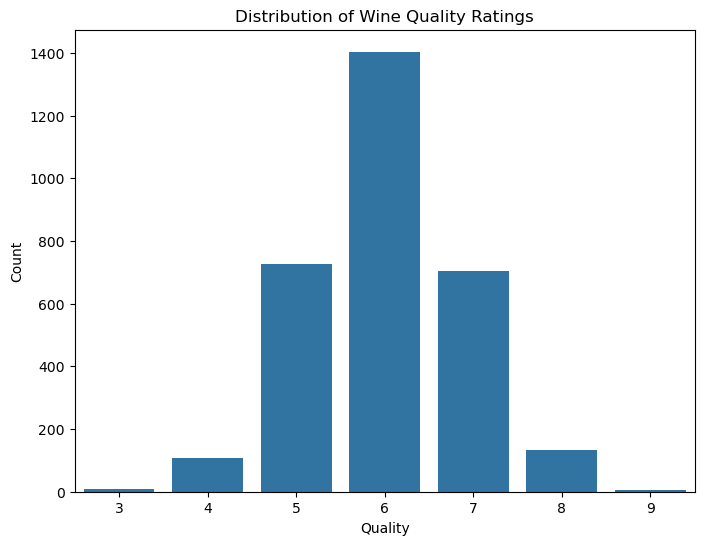

In [5]:
# quality graph
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [6]:
# The scale for wine quality is 1-10, so we create a binary classification to use for our ML models
df['quality_label'] = np.where(df['quality'] >= 7, 'good', 'not good')
df.drop('quality', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3090 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3090 non-null   float64
 1   volatile acidity      3090 non-null   float64
 2   citric acid           3090 non-null   float64
 3   residual sugar        3090 non-null   float64
 4   chlorides             3090 non-null   float64
 5   free sulfur dioxide   3090 non-null   float64
 6   total sulfur dioxide  3090 non-null   float64
 7   density               3090 non-null   float64
 8   pH                    3090 non-null   float64
 9   sulphates             3090 non-null   float64
 10  alcohol               3090 non-null   float64
 11  quality_label         3090 non-null   object 
dtypes: float64(11), object(1)
memory usage: 313.8+ KB


In [8]:
# convert categorical variables into numerical ones using one-hot encoding to use in our model
df = pd.get_dummies(df, columns=['quality_label'], drop_first=True)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label_not good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,True
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,True
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,True
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,True


In [10]:
# check that shape
df.shape

(3090, 12)

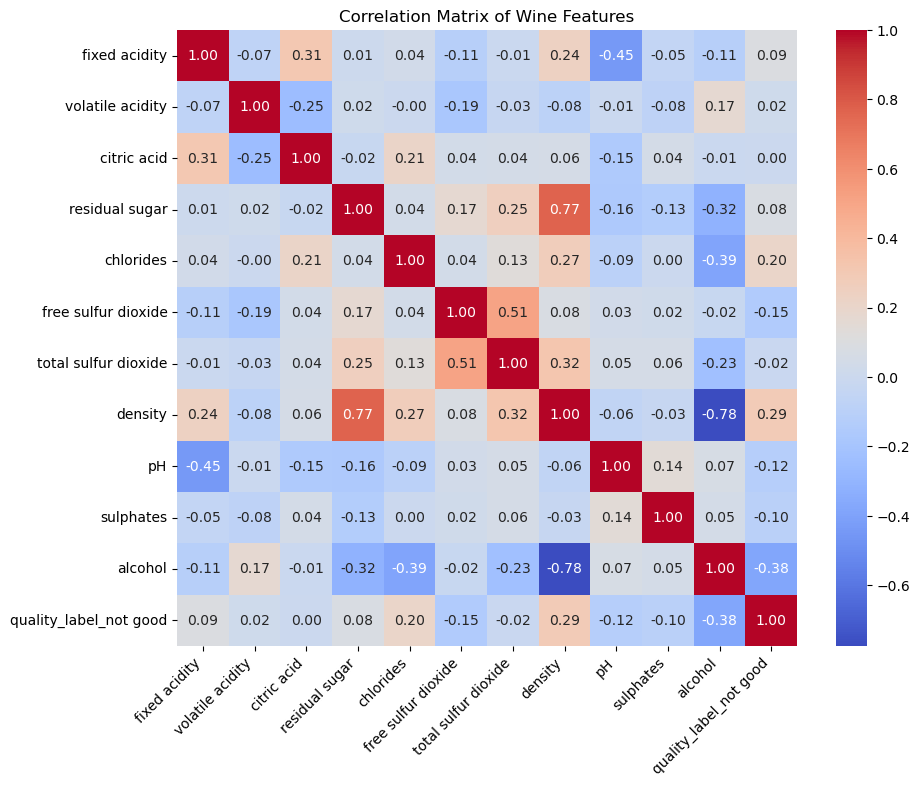

In [11]:
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.xticks(rotation=45, ha='right')
plt.show()

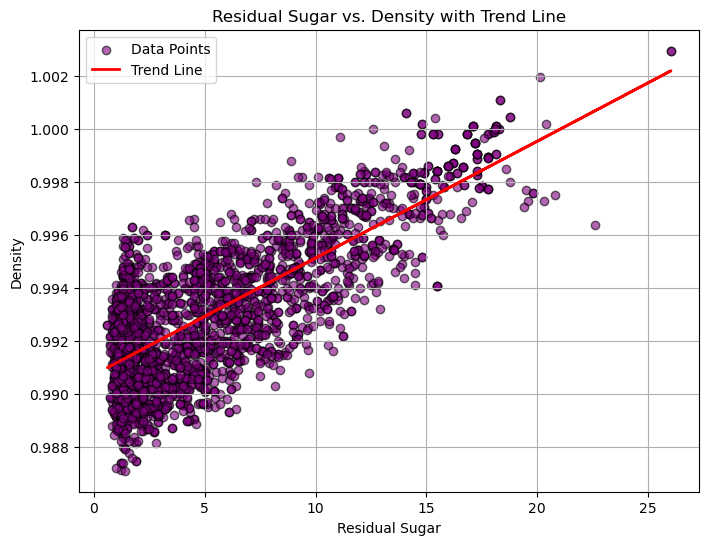

In [14]:
#illustrate that sugar and density is proportional - multi collinearity
a = df['residual sugar']
b = df['density']
plt.figure(figsize=(8, 6))
plt.scatter(a, b, alpha=0.6, color='purple', edgecolor='k', label='Data Points')
coefficients = np.polyfit(a, b, 1)  
trend_line = np.poly1d(coefficients)
plt.plot(a, trend_line(a), color='red', linewidth=2, label='Trend Line')
plt.title('Residual Sugar vs. Density with Trend Line')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
x_values = df['residual sugar']
y_values = df['density']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_matrix = np.corrcoef(x_values, y_values)
print("Correlation coefficient:", corr_matrix[0, 1])

Correlation coefficient: 0.7657848803711766


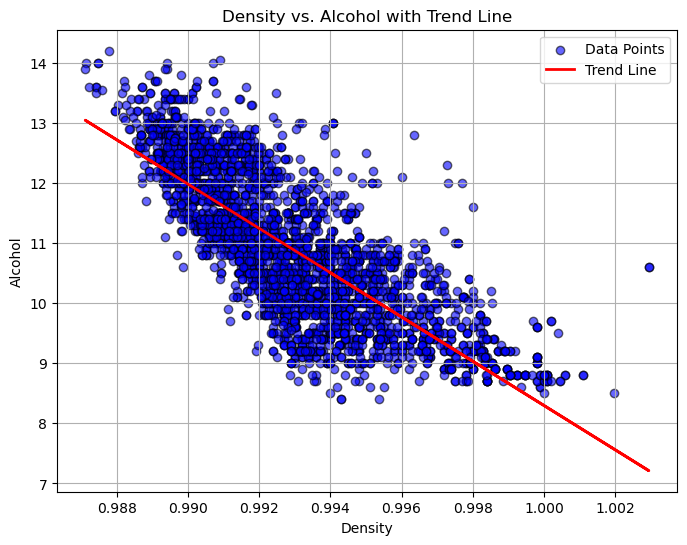

In [24]:
# illustrates that sugar and Alcohol is inversed 
run = df['density']
rise = df['alcohol']
plt.figure(figsize=(8, 6))
plt.scatter(run, rise, alpha=0.6, color='blue', edgecolor='k', label='Data Points')
coefficients = np.polyfit(run, rise, 1)  
trend_line = np.poly1d(coefficients)
plt.plot(run, trend_line(run), color='red', linewidth=2, label='Trend Line')
plt.title('Density vs. Alcohol with Trend Line')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
# Add the linear regression equation and line to plot -  sugar and Alcohol
from scipy.stats import linregress
x2_values = df['residual sugar']
y2_values = df['alcohol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_matrix = np.corrcoef(x2_values, y2_values)
print("Correlation coefficient:", corr_matrix[0, 1])

Correlation coefficient: -0.3170400981344824


In [14]:
# Tried dropping 'residual sugar' because of it's multi collinearity with 'density' to improve accuracy and recall.
# df.drop(columns=['residual sugar'], inplace=True)
# df.head()

In [15]:
# Tried dropping 'density' because of it's multi collinearity with 'residual sugar' to improve accuracy and recall.
# df.drop(columns=['density'], inplace=True)
# df.head()

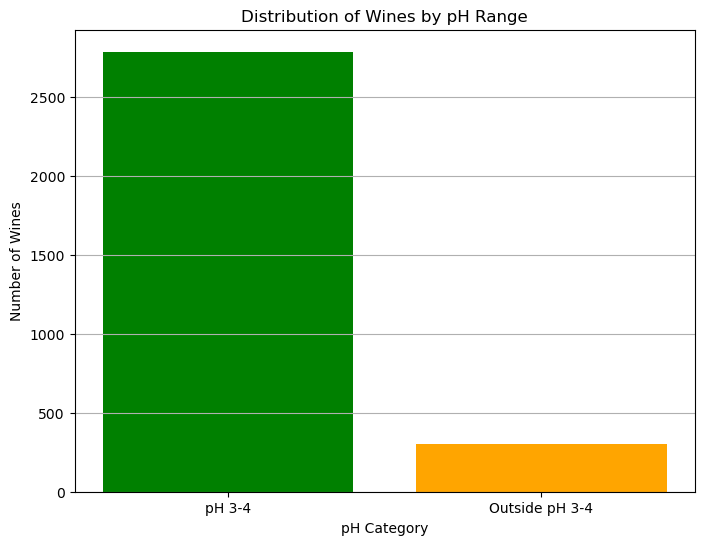

In [16]:
# see what the ratio of wines outside the 3-4 ph range is
count_within_range = df[(df['pH'] >= 3) & (df['pH'] <= 4)].shape[0]
count_outside_range = df[(df['pH'] < 3) | (df['pH'] > 4)].shape[0]
categories = ['pH 3-4', 'Outside pH 3-4']
counts = [count_within_range, count_outside_range]
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'orange'])
plt.title('Distribution of Wines by pH Range')
plt.xlabel('pH Category')
plt.ylabel('Number of Wines')
plt.grid(axis='y')
plt.show()

Quality Counts for Wines with pH Outside 3-4:
quality_label_not good
True     243
False     62
Name: count, dtype: int64


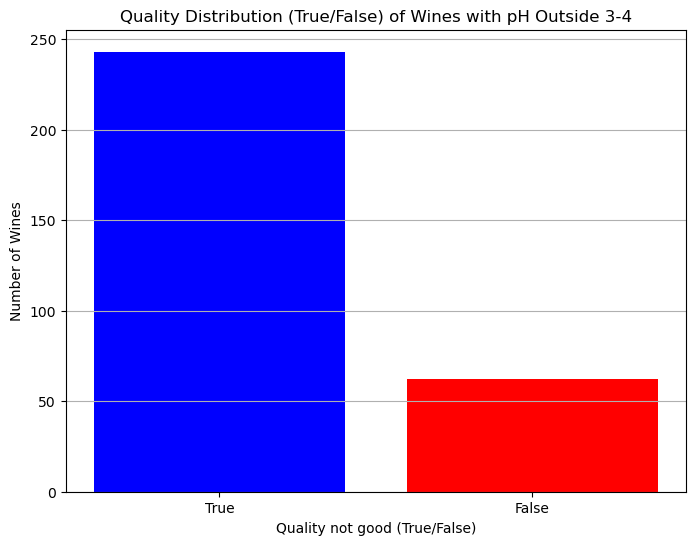

In [17]:
#wines that are good outside of the range could be outliers
wines_outside_range = df[(df['pH'] < 3) | (df['pH'] > 4)]
quality_counts = wines_outside_range['quality_label_not good'].value_counts()
print("Quality Counts for Wines with pH Outside 3-4:")
print(quality_counts)
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index.astype(str), quality_counts.values, color=['blue', 'red'])
plt.title('Quality Distribution (True/False) of Wines with pH Outside 3-4')
plt.xlabel('Quality not good (True/False)')
plt.ylabel('Number of Wines')
plt.grid(axis='y')
plt.show()

In [18]:
# Tried dropping values that are outside optimum ph levels to improve accuracy and recall
# df=df.loc[(df['pH'] >= 3) & (df['pH'] <= 4)]

In [19]:
# separate features from target
y=df['quality_label_not good']
X=df.drop(columns='quality_label_not good')

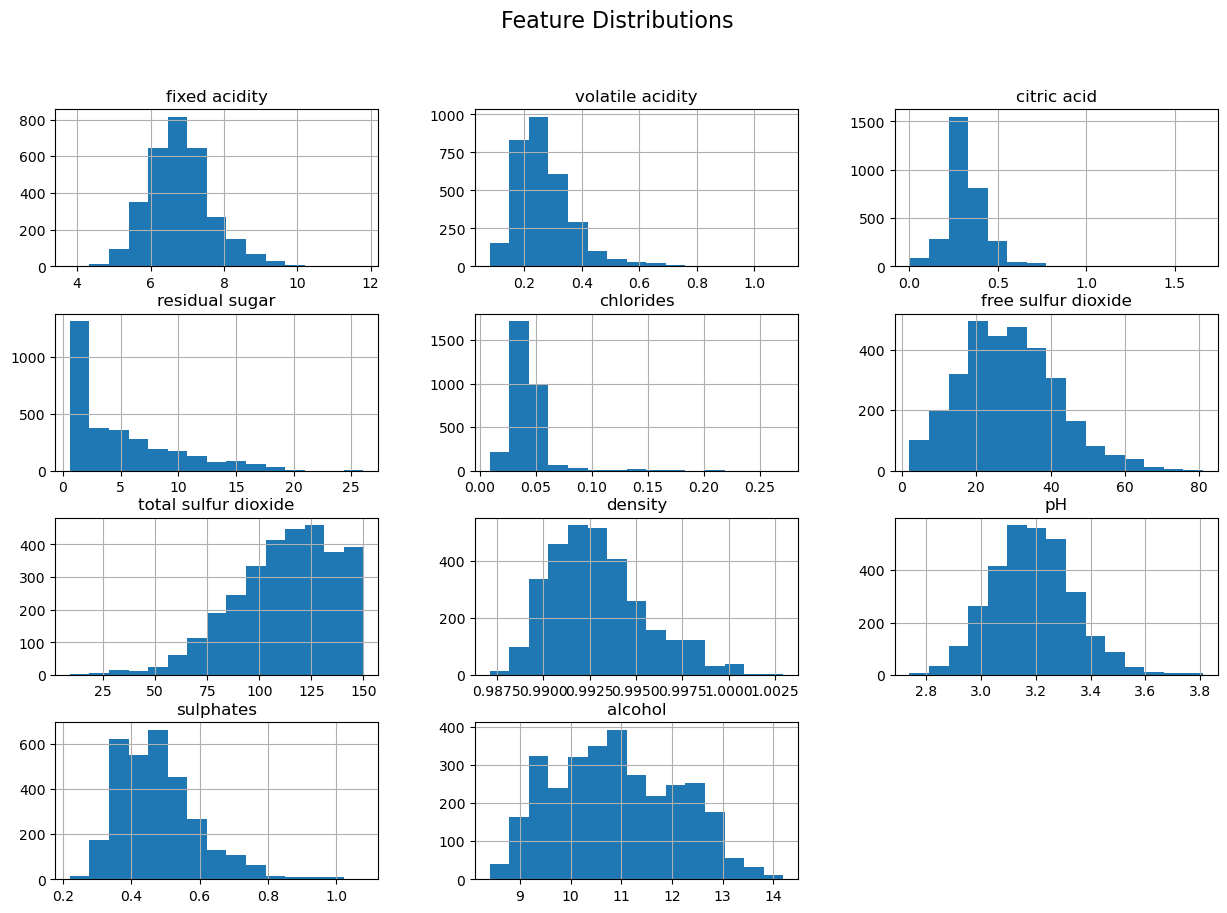

In [20]:
# bin our data to view distributions
X.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [21]:
# clean it up, scale it etc
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


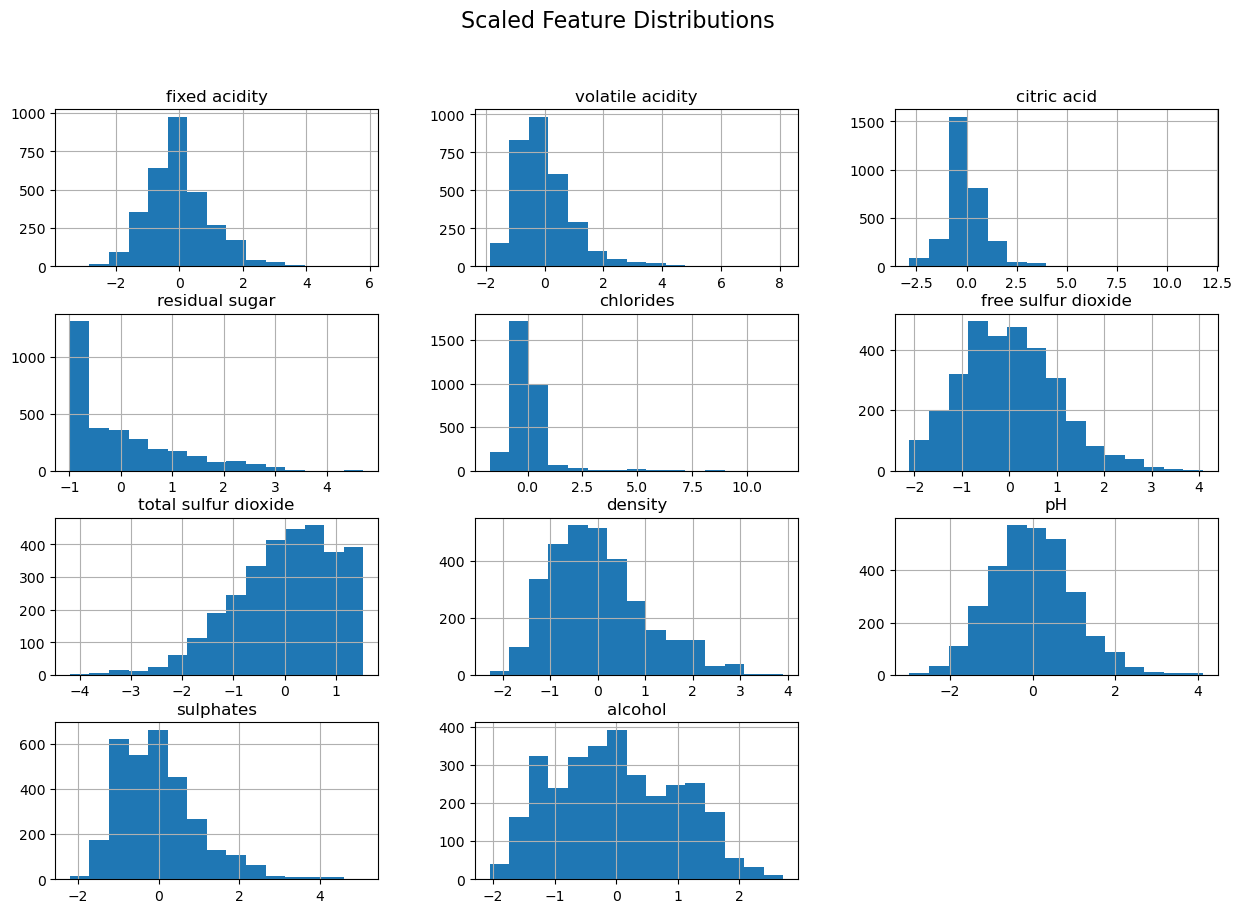

In [22]:
# bin our data to view distributions of our scaled data
X_scaled_df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Scaled Feature Distributions', fontsize=16)
plt.show()

In [23]:
# try stratifying our data before splitting and using xgboost model
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Initialize the Stratified K-Fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1776)

# Initialize the XGBoost model
xgb_clf = XGBClassifier(random_state=1776, scale_pos_weight=len(y[y == 0]) / len(y[y == 1]))

# Lists to store scores for each fold
precision_scores = []
recall_scores = []
f1_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X_scaled, y):
    # Split the data
    X_train_strat, X_test_strat = X_scaled[train_index], X_scaled[test_index]
    y_train_strat, y_test_strat = y.iloc[train_index], y.iloc[test_index]

    # Fit the XGBoost model
    xgb_clf.fit(X_train_strat, y_train_strat)

    # Make predictions
    strat_predictions = xgb_clf.predict(X_test_strat)

    # Calculate metrics
    precision = precision_score(y_test_strat, strat_predictions)
    recall = recall_score(y_test_strat, strat_predictions)
    f1 = f1_score(y_test_strat, strat_predictions)

    # Store the scores
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average scores
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

Average Precision: 0.8799
Average Recall: 0.8727
Average F1 Score: 0.8761


In [24]:
# classification report for the stratified data
strat_test_report = classification_report(y_test_strat, strat_predictions)
print(strat_test_report)

              precision    recall  f1-score   support

       False       0.64      0.66      0.65       169
        True       0.87      0.86      0.87       449

    accuracy                           0.81       618
   macro avg       0.76      0.76      0.76       618
weighted avg       0.81      0.81      0.81       618



In [25]:
# train test module on our standard data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y, 
                                                    random_state=1776, 
                                                    stratify=y)
X_train.shape

(2317, 11)

In [26]:
# logistic regress
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=200,
                               random_state=1776)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1776)

In [27]:
# predictions and confusion matrix
testing_predictions = classifier.predict(X_test)
test_matrix = confusion_matrix(y_test, testing_predictions)
print(test_matrix)

[[ 78 133]
 [ 56 506]]


In [28]:
# classification report for our standard data
test_report = classification_report(y_test, testing_predictions)
print(test_report)

              precision    recall  f1-score   support

       False       0.58      0.37      0.45       211
        True       0.79      0.90      0.84       562

    accuracy                           0.76       773
   macro avg       0.69      0.64      0.65       773
weighted avg       0.73      0.76      0.74       773



In [29]:
# running svm model
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=1776)
svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.68      0.33      0.44       211
        True       0.79      0.94      0.86       562

    accuracy                           0.77       773
   macro avg       0.74      0.64      0.65       773
weighted avg       0.76      0.77      0.75       773



In [30]:
# running random forest model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=1776)
rf_clf.fit(X_train, y_train)
predictions = rf_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.79      0.55      0.65       211
        True       0.85      0.94      0.89       562

    accuracy                           0.84       773
   macro avg       0.82      0.75      0.77       773
weighted avg       0.83      0.84      0.83       773



In [31]:
# try balancing data and still use random forest
# added balanced class weights with compute_class_weight - calculates weights for each class based on their frequency
# Oversampling: Duplicate data points from the minority class to match the majority class.
# Undersampling: Remove data points from the majority class to match the minority class.

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert the classes to a numpy array
classes = np.array([0, 1])

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=1776, class_weight=class_weight_dict)
rf_clf.fit(X_train, y_train)

predictions = rf_clf.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

       False       0.80      0.53      0.64       211
        True       0.84      0.95      0.89       562

    accuracy                           0.84       773
   macro avg       0.82      0.74      0.77       773
weighted avg       0.83      0.84      0.82       773



In [32]:
# xgboost model - our best performing model
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=1776, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_clf.fit(X_train, y_train)
predictions = xgb_clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.71      0.68      0.69       211
        True       0.88      0.90      0.89       562

    accuracy                           0.84       773
   macro avg       0.80      0.79      0.79       773
weighted avg       0.83      0.84      0.84       773

